<a href="https://colab.research.google.com/github/LukaT11/quantitative_finance/blob/master/DC%20Projects/Univariate_Investment_Risk_and_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install quandl

In [0]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

# Financial timeseries data

In finance, it is common to be working with a CSV (comma-separated-values) "flat" file of a timeseries of many different assets with their prices, returns, or other data over time. Sometimes the data is stored in databases, but more often than not, even large banks still use spreadsheets.

In [0]:
data = quandl.get("WIKI/IBM", start_date='2012-1-1', end_date='2015-6-1')

data = data.sort_values(by='Date')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-01-03,186.73,188.71,186.00,186.30,5646000.0,0.0,1.0,157.942079,159.616825,157.324622,157.578371,5646000.0
2012-01-04,185.57,186.33,184.94,185.54,4346700.0,0.0,1.0,156.960915,157.603746,156.428041,156.935540,4346700.0
2012-01-05,184.81,185.03,183.10,184.66,4463100.0,0.0,1.0,156.318083,156.504166,154.871711,156.191208,4463100.0
2012-01-06,184.39,184.48,182.31,182.54,4897100.0,0.0,1.0,155.962834,156.038958,154.203505,154.398046,4897100.0
2012-01-09,182.20,182.27,180.27,181.59,5201200.0,0.0,1.0,154.110463,154.169671,152.478009,153.594506,5201200.0


## Calculating financial returns

The Adjusted Close column is the most important. It is normalized for stock splits, dividends, and other corporate actions, and is a true reflection of the return of the stock over time. 

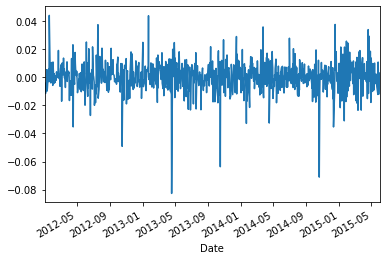

In [0]:
data["Returns"] = data['Adj. Close'].pct_change()

data['Returns'].plot()
plt.show()

## Return distributions

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns of a stock using a histogram.

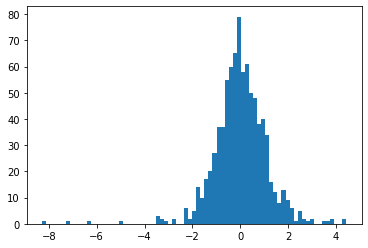

In [0]:
percent_return = data['Returns']*100
returns_plot = percent_return.dropna()
plt.hist(returns_plot, bins=75)
plt.show()

## Mu

You can calculate the average historical return of a stock by using numpy's `mean()` function.

In [0]:
mean_return_daily = np.mean(data['Returns'])
print(mean_return_daily)

4.329666130413714e-05


You can use the formula below to estimate the average annual return of a stock given the average daily return and the number of trading days in a year (typically there are roughly 252 trading days in a year):
\begin{equation*}
Average Annualized Return=((1+μ)^{252})−1
\end{equation*}

In [0]:
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.01097025926147599


## Variance

Just like you estimated the first moment of the returns distribution in the last exercise, you can can also estimate the second moment, or variance of a return distribution using `numpy`.

In this case, you will first need to calculate the daily standard deviation ( σ ), or volatility of the returns using `np.std()`. The variance is simply σ2.

In [0]:
sigma_daily = np.std(data['Returns'])
print(sigma_daily)

0.011099575185170279


In [0]:
variance_daily = sigma_daily**2
print(variance_daily)

0.00012320056929124784


## Annualizing variance

You can't annualize the variance in the same way that you annualized the mean.

In this case, you will need to multiply σ by the square root of the number of trading days in a year. There are typically 252 trading days in a calendar year. Let's assume this is the case for this exercise.

This will get you the annualized volatility, but to get annualized variance, you'll need to square the annualized volatility just like you did for the daily calculation.

In [0]:
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

0.17620029359054556


In [0]:
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.031046543461394453


## Skewness

To calculate the third moment, or skewness of a returns distribution in Python, you can use the `skew()` function from `
scipy.stats`.

Remember that a negative skew is a right-leaning curve, while positive skew is a left-leaning curve. In finance, you would tend to want positive skewness, as this would mean that the probability of large positive returns is unusually high, and the negative returns are more closely clustered and predictable.

In [0]:
clean_returns = data['Returns'].dropna()

In [0]:
returns_skewness = skew(clean_returns)
print(returns_skewness)

-0.867065885228463


## Kurtosis

Finally, to calculate the fourth moment of a distribution, you can use the `kurtosis()` function from `scipy.stats`.

Note that this function actually returns the excess kurtosis, not the 4th moment itself. In order to calculate kurtosis, simply add 3 to the excess kurtosis returned by `kurtosis()`.

In [0]:
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

7.582133463149487


In [0]:
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

10.582133463149487


## Statistical tests for normality

In order to truly be confident in your judgement of the normality of the stock's return distribution, you will want to use a true statistical test rather than simply examining the kurtosis or skewness.

You can use the `shapiro()` function from `scipy.stats` to run a Shapiro-Wilk test of normality on the stock returns. The function will return two values in a list. The first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to make a judgement about the normality of the data. If the p-value is less than or equal to 0.05, you can safely reject the null hypothesis of normality and assume that the data are non-normally distributed.

In [0]:
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

Shapiro results: (0.928106963634491, 8.053507345763851e-20)


In [0]:
p_value = shapiro_results[1]
print("P-value: ", p_value)

P-value:  8.053507345763851e-20
